In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
spotify_df = pd.read_csv('spotify-2023.csv',  encoding='latin-1')

In [6]:
spotify_df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [7]:
spotify_df['released_date'] = pd.to_datetime(pd.DataFrame({
    'year': spotify_df['released_year'],
    'month': spotify_df['released_month'],
    'day': spotify_df['released_day']
}))

In [8]:
import calendar
spotify_df['released_weekday'] = spotify_df['released_date'].dt.weekday.apply(lambda x: calendar.day_name[x])

In [9]:
spotify_df.filter(like='released_')

,released_year,released_month,released_day,released_date,released_weekday
0,2023,7,14,2023-07-14,Friday
1,2023,3,23,2023-03-23,Thursday
2,2023,6,30,2023-06-30,Friday
3,2019,8,23,2019-08-23,Friday
4,2023,5,18,2023-05-18,Thursday
...,...,...,...,...,...
948,2022,11,3,2022-11-03,Thursday
949,2022,10,21,2022-10-21,Friday
950,2022,11,3,2022-11-03,Thursday
951,2022,10,20,2022-10-20,Thursday


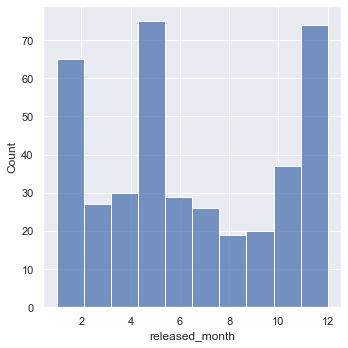

In [149]:
sns.displot(spotify_df[spotify_df['released_year'] == 2022]['released_month'])

In [150]:
spotify_df[spotify_df['released_year'] == 2022]['released_month']

14      3
15     12
26      3
32     12
33     10
       ..
948    11
949    10
950    11
951    10
952    11
Name: released_month, Length: 402, dtype: int64

In [70]:
artist = spotify_df[spotify_df['artist(s)_name'].str.lower().str.contains('justin')]
artist.sort_values(by='streams', ascending=False)[['track_name', 'artist(s)_name', 'streams']]

,track_name,artist(s)_name,streams
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
762,Love Yourself,Justin Bieber,2123309722
554,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",1445941661
158,Ghost,Justin Bieber,1167330737
453,Mistletoe,Justin Bieber,629173063
543,Medallo,"Justin Quiles, Lenny Tavï¿½ï¿½rez, BL",393230256
642,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",223319934
894,"Stay With Me (with Justin Timberlake, Halsey, ...","Calvin Harris, Halsey, Pharrell Williams, Just...",123473120
813,Honest (feat. Don Toliver),"Justin Bieber, Don Toliver",106919680
338,Private Landing (feat. Justin Bieber & Future),"Don Toliver, Future, Justin Bieber",105062254


In [147]:
spotify_df.sort_values(by='streams', ascending=False)[:100]['artist(s)_name'].value_counts()

artist(s)_name
Ed Sheeran                6
The Weeknd                5
Harry Styles              3
Bruno Mars                3
Eminem                    3
                         ..
Bad Bunny, Jhay Cortez    1
Maroon 5                  1
Chris Molitor             1
Lil Nas X                 1
Don Omar, Lucenzo         1
Name: count, Length: 77, dtype: int64

In [139]:
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce').fillna(0)

In [ ]:
spotify_df['streams'].sort_index